# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>

### Exercise 08.1

Il principio variazionale nella Meccanica Quantistica afferma che il valore atteso dell'Hamiltoniana su uno stato quantistico di prova (buono) ha come limite inferiore l'energia dello stato fondamentale $E_0$:

$$
\langle \hat{H} \rangle_T = \frac{\int dx \, \Psi_T^*(x) \hat{H} \Psi_T(x)}{\int dx \, |\Psi_T(x)|^2} \geq E_0 = \frac{\langle \Psi_0 | \hat{H} | \Psi_0 \rangle}{\langle \Psi_0 | \Psi_0 \rangle}
$$

In questo esercizio viene chiesto di ottimizzare variazionalmente lo stato fondamentale di una singola particella quantistica in uno spazio unidimensionale (1D) confinata dal seguente potenziale:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Poichè questo modello non è risolvibile analiticamente, verrà utilizzata una funzione d'onda di prova, parametrizzata da un insieme di parametri variazionali, che verrà ottimizzata attraverso il metodo Monte Carlo Variazionale (VMC). Un modello approssimativo per la funzione d'onda dello stato fondamentale è la seguente funzione d'onda di prova:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x - \mu)^2}{2\sigma^2}} + e^{-\frac{(x + \mu)^2}{2\sigma^2}}
$$

che dipende da due parametri variazionali, $\sigma$ e $\mu$.

Per campionare il modulo quadro della funzione d'onda di prova $|\Psi_T^{\sigma,\mu}(x)|^2$, è stato utilizzato l'algoritmo di Metropolis con una probabilità di transizione uniforme e un passo $\delta=2.9$ per fissare l'accettazione al 50%. Nota che qui non è necessaria la normalizzazione di $|\Psi_T^{\sigma,\mu}(x)|^2$, perchè si semplifica nel calcolo della probabilità di accettazione. Successivamente, è stato utilizzato il metodo della media a blocchi per calcolare il valore di aspettazione dell'Hamiltoniana:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

dove

$$
\frac{\partial^2}{\partial x^2} \Psi_T^{\sigma,\mu}(x) = \frac{1}{\sigma^2} \left(\frac{(x-\mu)^2}{\sigma^2} e^{-\frac{(x-\mu)^2}{2\sigma^2}} - e^{-\frac{(x-\mu)^2}{2\sigma^2}} + \frac{(x+\mu)^2}{\sigma^2} e^{-\frac{(x+\mu)^2}{2\sigma^2}} - e^{-\frac{(x+\mu)^2}{2\sigma^2}} \right)
$$

e 

$$
\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \frac{-\frac{\hbar^2}{2m\sigma^2} \left(\frac{(x-\mu)^2}{\sigma^2} e^{-\frac{(x-\mu)^2}{2\sigma^2}} - e^{-\frac{(x-\mu)^2}{2\sigma^2}} + \frac{(x+\mu)^2}{\sigma^2} e^{-\frac{(x+\mu)^2}{2\sigma^2}} - e^{-\frac{(x+\mu)^2}{2\sigma^2}}\right)}{e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}} + V(x)
$$

che verrà utilizzato per trovare i parametri che minimizzano questa quantità ($\hbar = 1$ e $m=1$).
In questa prima parte dell'esercizio, per controllare il funzionamento del codice, sono stati fissati i valori dei parametri variazionali a $\mu=0.85$ e $\sigma=0.68$. Questi valori sono stati cercati in modo che rendessero più "simile" possibile la nostra funzione di prova alla soluzione numerica ottenuta trasformando l'equazione di Schrödinger in un'equazione matriciale.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

Ground state energy:  -0.460465879692715
1st excited state energy:  0.0974247133176097
2nd excited state energy:  1.9717331343930198


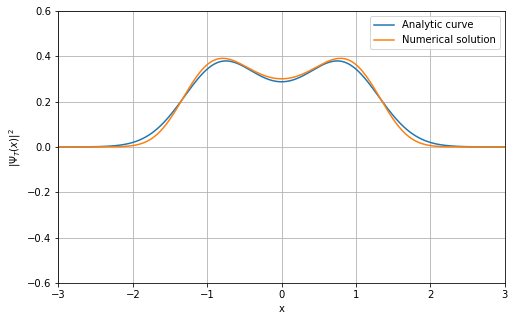

In [2]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
def psi2(x,mu,sigma):
    alpha = ((x-mu)/sigma)**2
    beta = ((x+mu)/sigma)**2
    N = 2*sigma*np.sqrt(np.pi)*(1+np.exp(-mu**2/sigma**2))
    return (np.exp(-alpha/2.) + np.exp(-beta/2.))**2/N

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations
mu = 0.85
sigma = 0.68

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
#plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,psi2(x,mu,sigma), label='Analytic curve')
plt.plot(x,(psi[0])**2, label='Numerical solution')
#plt.plot(x,(psi[1])**2)
#plt.plot(x,(psi[2])**2)
#plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.ylabel("$|\Psi_T(x)|^2$")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

In [3]:
VMC = np.loadtxt('VMC_result.txt', delimiter=' ')
print("Mean ground state energy = " + str(VMC[-1][0]) + " +/- " + str(VMC[-1][1]))
print("mu = " + str(mu))
print("sigma = " + str(sigma))

Mean ground state energy = -0.40213 +/- 0.00191872
mu = 0.85
sigma = 0.68


### Exercise 08.2

In questo esercizio viene chiesto di esplorare lo spazio dei parametri per trovare i valori di $\sigma$ e $\mu$ che minimizzano $\langle \hat{H} \rangle_T$, tramite un algoritmo di *Simulated Annealing* (SA). L'algoritmo *simulated annealing* sfrutta la potenza della natura di trovare lo stato di minima energia, raffreddando lentamente un sistema. Infatti, ad esempio se un liquido viene raffreddato rapidamente, non raggiunge questo stato ma finisce per trovarsi in uno stato policristallino o amorfo con energia leggermente più alta. Più nel dettaglio, l'idea è interpretare la funzione costo $L(\vec{x})$, come l'energia di un sistema di meccanica statistica e campionare dalla distribuzione di Boltzmann 

$$ p(\vec{x}) = \frac{e^{-\beta L(\vec{x})}}{Z} $$ 

facendo variare $\beta$ nel tempo, attraverso l'algoritmo di Metropolis, dato che nel limite di basse temperature $\beta\to\infty$ la distribuzione si concentra sui minimi di $L(\vec{x})$. Mathematicamente, tale processo è una catena di Markov dipendente dal tempo. 

La simulazione è stata impostata in modo che, partendo da $\beta=1$, ogni 5 step $\beta$ aumentasse di 2 il suo valore. Il passo del VMC $\delta_{VMC}$ per campionare i parametri variazionali $\sigma$ e $\mu$, è stato preso proporzionale a $\beta$ secondo una legge di potenza del tipo $\delta_{VMC}=\beta^{-1/2}$. Ad ogni passo del SA è stata calcolata la compatibilità tra il valore di aspettazione dell'Hamiltoniana $\langle \hat{H} \rangle_{new}$ e $\langle \hat{H} \rangle_{old}$, così che quando questi valori sono diventati compatibili l'ottimizzazione si è interrotta, in quando non sarebbe stato possibile fare di meglio. Infatti, se l'energia fluttua con lo stesso ordine di grandezza dell'incertezza statistica, non ha senso proseguire con l'ottimizzazione.

In [4]:
beta = np.loadtxt('SA_result.txt', usecols=(0))
energy = np.loadtxt('SA_result.txt', usecols=(1,2))
betaSA = np.loadtxt('SA_configurations.txt', usecols=(0), skiprows=1)
muSA = np.loadtxt('SA_configurations.txt', usecols=(1), skiprows=1)
sigmaSA = np.loadtxt('SA_configurations.txt', usecols=(2), skiprows=1)
sampled_config = np.loadtxt('VMC_configurations.txt')

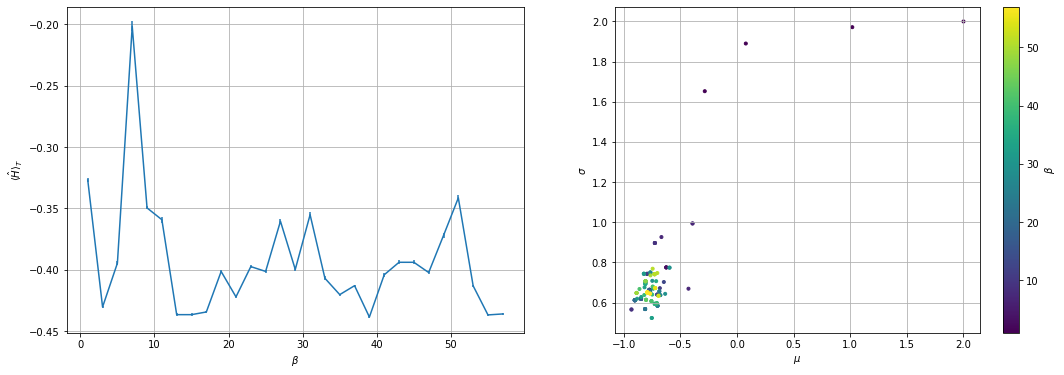

In [5]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(18,6))
ax0.errorbar(beta, energy[:,0], yerr=energy[:,1])
ax0.set_xlabel(r'$\beta$')
ax0.set_ylabel(r'$\langle {\hat H} \rangle_{T}$')
ax0.grid(True)

sc = ax1.scatter(muSA, sigmaSA, c=betaSA, marker='.')
cbar = plt.colorbar(sc, ax=ax1)
cbar.set_label(r"$\beta$")
ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$\sigma$')
ax1.grid()
plt.show()

Una volta trovati i parametri che minimizzano $\langle \hat{H} \rangle_T$, che sono risultati essere pari a $\sigma=0.613555$ e $\mu=-0.803538$, è stata stimata l'energia dello stato fondamentale $E_0$ tenendo questi fissi, ovviamente usando il metodo della media a blocchi.

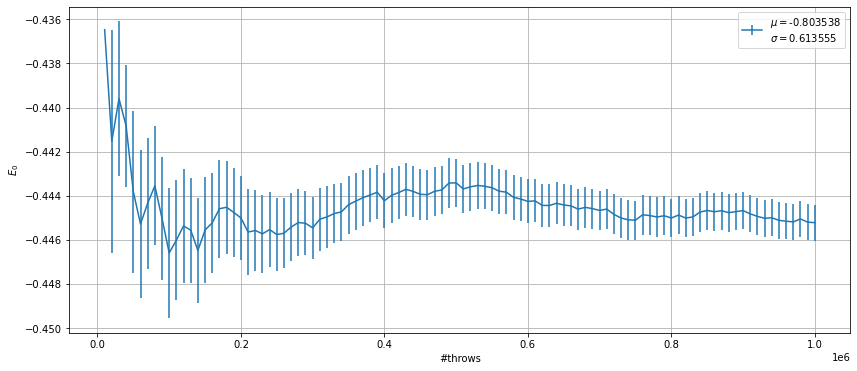

Mean ground state energy = -0.445222 +/- 0.000813137


In [6]:
N=100                 # Number of blocks
L=10000               # Number of throws in each block
X = np.arange(N) + 1  # [0,1,2,...,N-1]
X*=L                  # Number of throws = block * (Number of throws in each block)
mu=-0.803538
sigma=0.613555

energy_0 = np.loadtxt('VMC_result2.txt', delimiter=' ')
plt.figure(figsize=(14,6))
plt.errorbar(X, energy_0[:,0], yerr=energy_0[:,1], label='$\mu=$'+str(mu)+'\n$\sigma=$'+str(sigma))
plt.xlabel('#throws')
plt.ylabel(r'$E_0$')
plt.legend()
plt.grid(True)
plt.show()

print("Mean ground state energy = " + str(energy_0[-1][0]) + " +/- " + str(energy_0[-1][1]))

Infine, è stato "riempito" un istogramma con le configurazioni campionate e confrontata la soluzione approssimata ottenuta con il VMC, con la soluzione numerica esatta discretizzata.

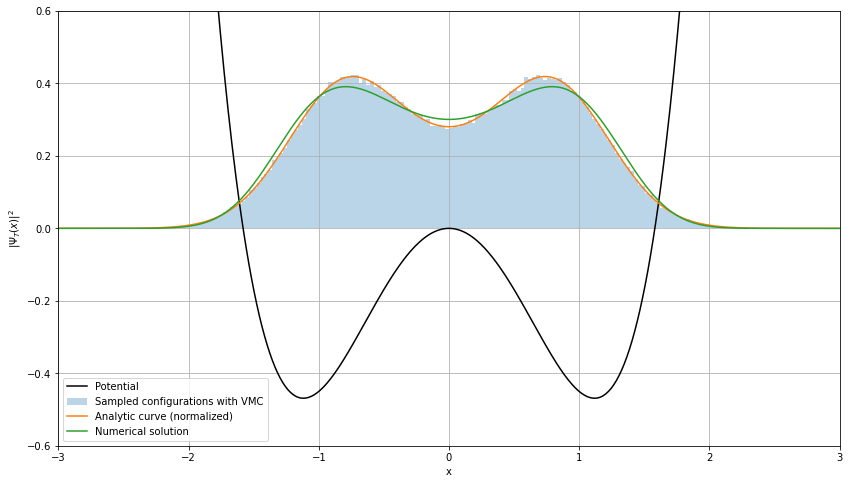

In [7]:
plt.figure(figsize=(14,8))
plt.plot(x, scale*V, color="Black", label='Potential') 
plt.hist(sampled_config, bins='auto', density=True, alpha=0.3, label='Sampled configurations with VMC')
plt.plot(x,psi2(x,mu,sigma), label='Analytic curve (normalized)')
plt.plot(x,(psi[0])**2, label='Numerical solution')
plt.xlabel("x")
plt.ylabel("$|\Psi_T(x)|^2$")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

Dal grafico notiamo che la curva analitica corrispondente ai parametri che sono stati ottenuti con il VMC, è leggermente diversa dalla soluzione numerica esatta. Infatti, Il VMC è un metodo approssimativo che dipende dalla particolare scelta della funzione di prova. Per un'approssimazione più accurata dovremmo usare un'*ansatz* più descrittiva.